
# Predicting Heart Disease

## Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.

## Goal - To predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

### Source Code -

In [14]:
#importing Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
#import DataSet
data=pd.read_csv('values.csv')
datatarget=pd.read_csv('labels.csv')


In [18]:
datatarget.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [90]:
datatarget.columns

Index(['patient_id', 'heart_disease_present'], dtype='object')

In [98]:
datatarget=datatarget.drop(columns=['patient_id'])

In [100]:
datatarget

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [20]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [24]:
datatarget.shape


(180, 2)

In [30]:
datatarget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   patient_id             180 non-null    object
 1   heart_disease_present  180 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [40]:
datatarget.isnull().sum()



patient_id               0
heart_disease_present    0
dtype: int64

In [42]:
data.shape

(180, 14)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [46]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [48]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

In [72]:
data['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [195]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64

In [193]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [80]:
datatarget.describe()

,heart_disease_present
count,180.000000
mean,0.444444
std,0.498290
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [102]:
df=pd.concat([data,datatarget],axis=1)

In [104]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


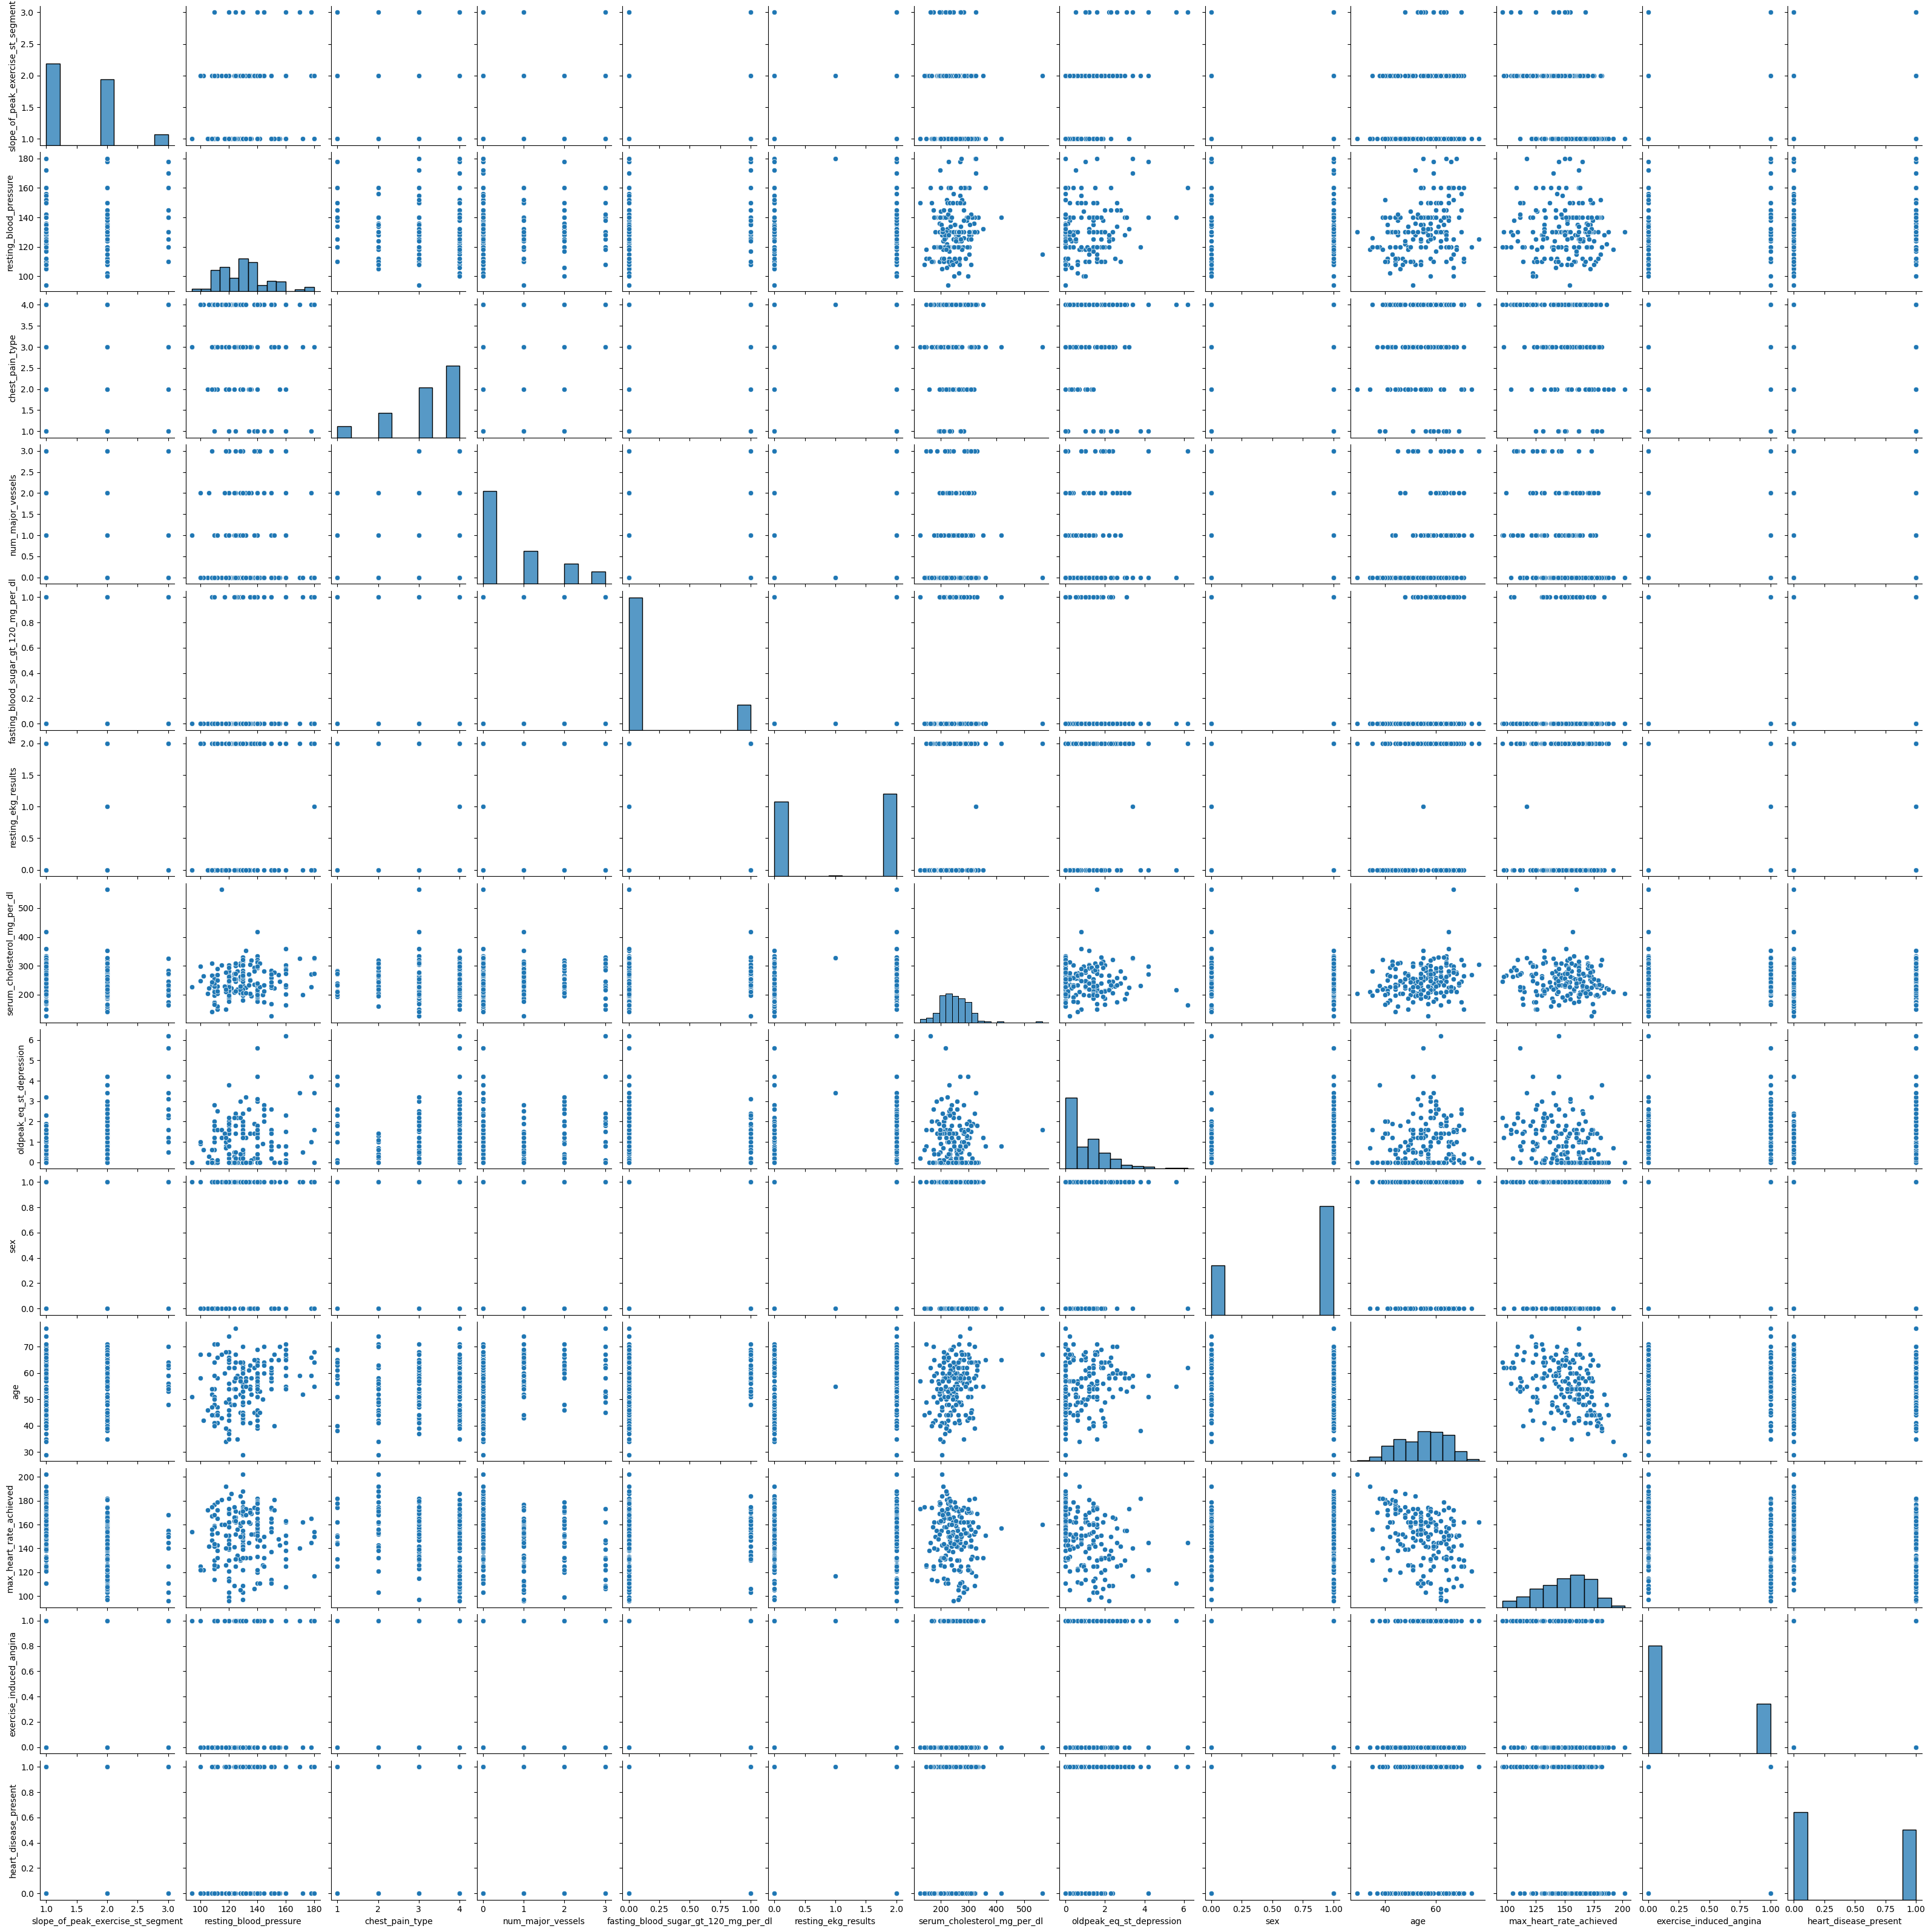

In [112]:
sns.pairplot(df)
plt.show()

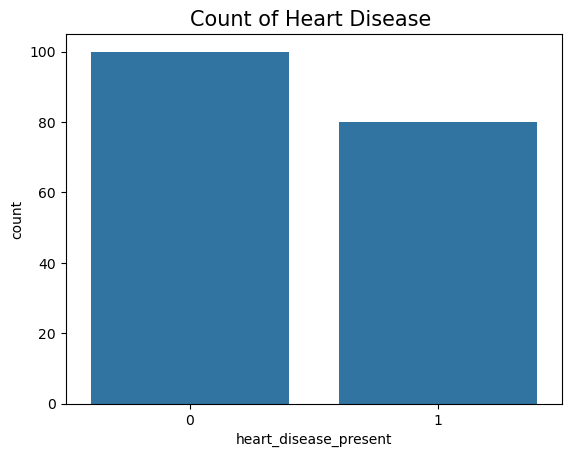

In [116]:
sns.countplot(x='heart_disease_present',data=df)
plt.title('Count of Heart Disease ', fontsize=15)
plt.show()

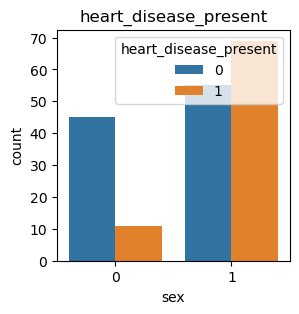

In [131]:
plt.figure(figsize=(3,3))
sns.countplot(x='sex',data=df,hue='heart_disease_present')
plt.title("heart_disease_present")
plt.show()

In [233]:
data = data.drop(columns= ['patient_id'])
X=data
y=datatarget

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 144
Testing set size: 36


In [237]:
X_train

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
117,1,reversible_defect,110,4,0,0,2,172,0.0,1,41,158,0
65,1,reversible_defect,126,4,0,0,2,282,0.0,1,35,156,1
67,2,normal,115,4,0,0,0,303,1.2,1,43,181,0
31,2,reversible_defect,150,4,3,0,2,225,1.0,0,65,114,0
12,1,normal,140,3,0,0,0,335,0.0,1,64,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,normal,112,4,0,0,0,204,0.1,1,47,143,0
106,1,reversible_defect,150,3,0,0,2,232,1.6,1,54,165,0
14,2,reversible_defect,120,1,0,0,0,231,3.8,1,38,182,1
92,1,normal,135,3,0,1,0,304,0.0,0,54,170,0


In [239]:
y_train

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [241]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
X_train['thal'] = encoder.fit_transform(X_train['thal'])
X_test['thal'] = encoder.transform(X_test['thal'])  # Apply the same transformation to test data
 

In [243]:
X_train

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
117,1,2,110,4,0,0,2,172,0.0,1,41,158,0
65,1,2,126,4,0,0,2,282,0.0,1,35,156,1
67,2,1,115,4,0,0,0,303,1.2,1,43,181,0
31,2,2,150,4,3,0,2,225,1.0,0,65,114,0
12,1,1,140,3,0,0,0,335,0.0,1,64,158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,112,4,0,0,0,204,0.1,1,47,143,0
106,1,2,150,3,0,0,2,232,1.6,1,54,165,0
14,2,2,120,1,0,0,0,231,3.8,1,38,182,1
92,1,1,135,3,0,1,0,304,0.0,0,54,170,0


In [ ]:
df = data.drop(columns=['Patient_ID'])

In [245]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)

In [173]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 117 to 102
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            144 non-null    object 
 1   slope_of_peak_exercise_st_segment     144 non-null    int64  
 2   thal                                  144 non-null    object 
 3   resting_blood_pressure                144 non-null    int64  
 4   chest_pain_type                       144 non-null    int64  
 5   num_major_vessels                     144 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  144 non-null    int64  
 7   resting_ekg_results                   144 non-null    int64  
 8   serum_cholesterol_mg_per_dl           144 non-null    int64  
 9   oldpeak_eq_st_depression              144 non-null    float64
 10  sex                                   144 non-null    int64  
 11  age                   

In [253]:
y_predict

array([0.12083356, 0.04151996, 0.44753445, 1.17680357, 0.02120932,
       0.80622428, 0.06536016, 0.0906163 , 0.65618756, 0.93968325,
       0.86462151, 1.11148011, 0.87423592, 0.16755786, 0.19684413,
       0.03544781, 0.4194533 , 0.12376396, 0.60647136, 0.97215485,
       0.13375326, 0.17540454, 0.87336485, 0.40465181, 0.13393994,
       0.58772334, 0.48354326, 0.05363378, 0.11673781, 0.67010913,
       0.58033279, 0.30074512, 1.15436227, 0.31916593, 0.97576448,
       0.14865081])

In [257]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)
r2score

0.4422833240638384

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [261]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [263]:
y_test

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [265]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [281]:
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.8333333333333334

In [267]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [269]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [271]:
y_test


array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [273]:
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob

array([[0.90496641, 0.09503359],
       [0.93207738, 0.06792262],
       [0.44604718, 0.55395282],
       [0.01103106, 0.98896894],
       [0.97386304, 0.02613696],
       [0.09266703, 0.90733297],
       [0.9648651 , 0.0351349 ],
       [0.93492741, 0.06507259],
       [0.44635048, 0.55364952],
       [0.06003275, 0.93996725],
       [0.14683459, 0.85316541],
       [0.01238689, 0.98761311],
       [0.03776626, 0.96223374],
       [0.91240255, 0.08759745],
       [0.87869058, 0.12130942],
       [0.95514765, 0.04485235],
       [0.47135827, 0.52864173],
       [0.9415614 , 0.0584386 ],
       [0.21401349, 0.78598651],
       [0.02153522, 0.97846478],
       [0.93531484, 0.06468516],
       [0.93567501, 0.06432499],
       [0.02168383, 0.97831617],
       [0.53071006, 0.46928994],
       [0.8805828 , 0.1194172 ],
       [0.21524691, 0.78475309],
       [0.74002112, 0.25997888],
       [0.94210726, 0.05789274],
       [0.88872273, 0.11127727],
       [0.31770148, 0.68229852],
       [0.

In [275]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [277]:
r2score

0.4422833240638384

In [287]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [289]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [293]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2 

0.5277777777777778